# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* Using Cross-validation
* Using Bootstrapping


## Test dataset

In [1]:
data <- iris

In [2]:
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
summary(data)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [5]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

In [7]:
Table1(data = data,y = "Species")

  |======================================================================| 100%

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



V1,V2,Pop,setosa,versicolor,virginica,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
Individuals,n,150,50,50,50,NA
Sepal.Length,Mean (SD),5.8 (0.8),5.0 (0.4),5.9 (0.5),6.6 (0.6),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.0 (4.8-5.2),5.9 (5.6-6.3),6.5 (6.2-6.9),0
Sepal.Width,Mean (SD),3.1 (0.4),3.4 (0.4),2.8 (0.3),3.0 (0.3),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.3),3.4 (3.2-3.7),2.8 (2.5-3.0),3.0 (2.8-3.2),0
Petal.Length,Mean (SD),3.8 (1.8),1.5 (0.2),4.3 (0.5),5.6 (0.6),NA
Petal.Length,Median (IQR),4.3 (1.6-5.1),1.5 (1.4-1.6),4.3 (4.0-4.6),5.5 (5.1-5.9),0
Petal.Width,Mean (SD),1.2 (0.8),0.2 (0.1),1.3 (0.2),2.0 (0.3),NA
Petal.Width,Median (IQR),1.3 (0.3-1.8),0.2 (0.2-0.3),1.3 (1.2-1.5),2.0 (1.8-2.3),0


In [23]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=False)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Test dataset

In [8]:
tab1 <- train_test(data = data, train_name = "temp", test_name = "test",prop = 0.7, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test



  |======================================================================| 100%

You got a perfectly balanced training and test datasets

 



In [9]:
dim(temp)
dim(test)

[1] 105   5

[1] 45  5

In [10]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,150,105,45,NA
Sepal.Length,Mean (SD),5.8 (0.8),5.8 (0.9),5.8 (0.7),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.8 (5.1-6.4),5.8 (5.2-6.5),0.991
Sepal.Width,Mean (SD),3.1 (0.4),3.1 (0.4),3.1 (0.4),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.3),3.0 (2.8-3.4),3.0 (2.8-3.3),0.832
Petal.Length,Mean (SD),3.8 (1.8),3.8 (1.8),3.7 (1.7),NA
Petal.Length,Median (IQR),4.3 (1.6-5.1),4.4 (1.6-5.1),4.2 (1.5-5.3),0.959
Petal.Width,Mean (SD),1.2 (0.8),1.2 (0.8),1.2 (0.8),NA
Petal.Width,Median (IQR),1.3 (0.3-1.8),1.4 (0.3-1.8),1.3 (0.3-1.8),0.95


## Train and Dev

In [11]:
tab2 <- train_test(data = temp, train_name = "train", test_name = "dev",prop = 0.7, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev



  |======================================================================| 100%

You got a perfectly balanced training and test datasets

 



In [12]:
dim(train)
dim(dev)

[1] 73  5

[1] 32  5

In [13]:
tab2
# pval should be larger than 0.05

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,105,73,32,NA
Sepal.Length,Mean (SD),5.8 (0.9),5.9 (0.9),5.8 (0.9),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.7 (5.1-6.4),6.0 (5.0-6.3),0.847
Sepal.Width,Mean (SD),3.1 (0.4),3.1 (0.4),3.0 (0.5),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.4),3.0 (2.8-3.4),3.0 (2.8-3.2),0.511
Petal.Length,Mean (SD),3.8 (1.8),3.7 (1.8),3.9 (1.8),NA
Petal.Length,Median (IQR),4.4 (1.6-5.1),4.4 (1.5-5.1),4.5 (1.7-5.2),0.536
Petal.Width,Mean (SD),1.2 (0.8),1.2 (0.8),1.2 (0.8),NA
Petal.Width,Median (IQR),1.4 (0.3-1.8),1.3 (0.3-1.8),1.4 (0.3-1.8),0.795


In [14]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

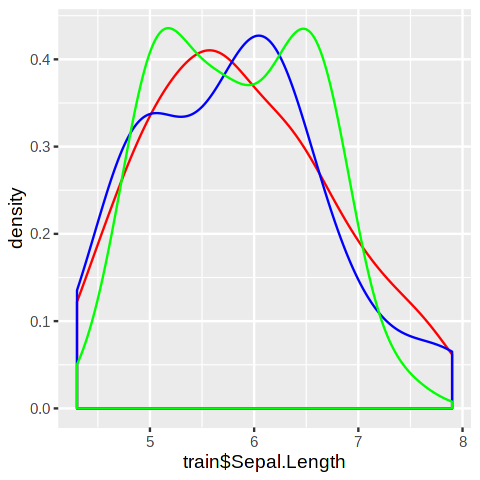

In [15]:
# checking that there is no diff between features
require(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 4)

ggplot() +
    geom_density(aes(x=train$Sepal.Length),color="red",alpha=0.3) +
    geom_density(aes(x=dev$Sepal.Length),color="blue",alpha=0.3) +
    geom_density(aes(x=test$Sepal.Length),color="green",alpha=0.3)


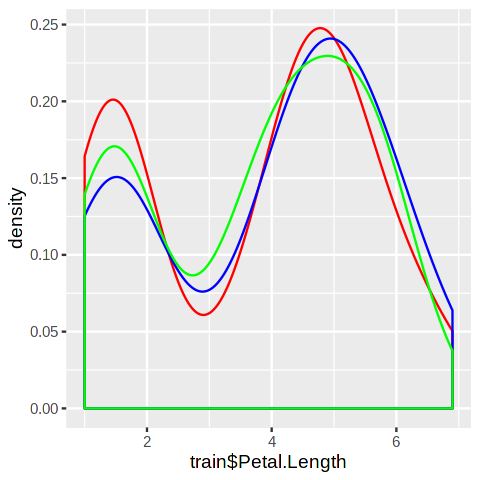

In [16]:
# checking that there is no diff bet
require(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 4)

ggplot() +
    geom_density(aes(x=train$Petal.Length),color="red",alpha=0.3) +
    geom_density(aes(x=dev$Petal.Length),color="blue",alpha=0.3) +
    geom_density(aes(x=test$Petal.Length),color="green",alpha=0.3)


# Train-Dev

In [17]:
library(ranger)

mod1 <- ranger(Species ~., data=train)


In [ ]:
help ('ranger')

In [18]:
mod1

Ranger result

Call:
 ranger(Species ~ ., data = train) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      73 
Number of independent variables:  4 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             2.74 % 

In [26]:
pred1 <- predict(mod1, data=dev)
pred1$predictions

[1] setosa     setosa     virginica  versicolor virginica  virginica 
 [7] virginica  virginica  versicolor virginica  setosa     versicolor
[13] versicolor setosa     versicolor setosa     versicolor setosa    
[19] versicolor setosa     virginica  virginica  versicolor virginica 
[25] virginica  setosa     setosa     virginica  versicolor setosa    
[31] versicolor virginica 
Levels: setosa versicolor virginica

In [27]:
#table is used for classification models whee we cannot find the RMSLE
table(obs=dev$Species, pred=pred1$predictions)

            pred
obs          setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          7         1
  virginica       0          3        11

In [28]:
caret::confusionMatrix(pred1$predictions,dev$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          7         3
  virginica       0          1        11

Overall Statistics
                                          
               Accuracy : 0.875           
                 95% CI : (0.7101, 0.9649)
    No Information Rate : 0.4375          
    P-Value [Acc > NIR] : 3.559e-07       
                                          
                  Kappa : 0.8107          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8750           0.7857
Specificity                 1.0000            0.8750           0.9444
Pos Pred Value              1.0000            0.7000           0.9167
Neg Pred Value              1.0000            0.9545           0.8500
P

# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [29]:
library(caret)
if(!require(party)) install.packages("party"); require(party)
# load the iris dataset
data(iris)

Loading required package: lattice



In [47]:
# define training control 
# cv - simple cross validation , repeatedcv - repeats 100 times on the cv. repeats=k
seeds <- vector(mode = "list", length = 51)
for(i in 1:50) seeds[[i]] <- sample.int(1000, 22)

train_control <- trainControl(method = "repeatedcv", repeats = 5,seeds)

# train the model
model <- train(Species~., data=train, trControl=train_control, method="ranger")

ERROR: Error in createFolds(y, k = k, list = TRUE, returnTrain = TRUE): (list) object cannot be coerced to type 'integer'


In [43]:
help('trainControl')

In [46]:
# summarize results
print(model)

Random Forest 

73 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 65, 66, 66, 66, 66, 65, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9719048  0.9572447
  2     extratrees  0.9867857  0.9797646
  3     gini        0.9719048  0.9572447
  3     extratrees  0.9776190  0.9658621
  4     gini        0.9719048  0.9572447
  4     extratrees  0.9719048  0.9572447

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = extratrees
 and min.node.size = 1.


# Leave-one-out Cross Validation

In [48]:
# define training control
train_control <- trainControl(method="LOOCV")
# train the model
model <- train(Species~., data=train, trControl=train_control, method="ranger")

In [49]:
# summarize results
print(model)

Random Forest 

73 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 72, 72, 72, 72, 72, 72, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9726027  0.9588501
  2     extratrees  0.9863014  0.9794308
  3     gini        0.9726027  0.9588501
  3     extratrees  0.9726027  0.9588501
  4     gini        0.9726027  0.9588501
  4     extratrees  0.9726027  0.9588501

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = extratrees
 and min.node.size = 1.


In [41]:
?caret::trainControl

In [ ]:
?carer::train

# Boostrapping - DO NOT USE on big datasets



In [51]:
# define training control
train_control <- trainControl(method="boot", number=100)
# train the model
model <- train(Species~., data=train, trControl=train_control,method="ranger")

In [52]:
# summarize results
print(model)

Random Forest 

73 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 73, 73, 73, 73, 73, 73, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9687622  0.9519891
  2     extratrees  0.9844949  0.9763154
  3     gini        0.9672750  0.9497586
  3     extratrees  0.9809828  0.9709569
  4     gini        0.9680126  0.9508800
  4     extratrees  0.9760761  0.9632868

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = extratrees
 and min.node.size = 1.


# Dataset Inbalance

In [53]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance

Installing package into ‘/home/dsuser14/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bnlearn’, ‘KernelKnn’, ‘smotefamily’


Loading required package: imbalance

Loading required package: ROSE

Loaded ROSE 0.0-3




In [54]:
data(newthyroid1)
head(newthyroid1)

T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
105,7.3,1.5,1.5,-0.1,negative
67,23.3,7.4,1.8,-0.6,positive
111,8.4,1.5,0.8,1.2,negative
89,14.3,4.1,0.5,0.2,positive
105,9.5,1.8,1.6,3.6,negative
110,20.3,3.7,0.6,0.2,positive


In [71]:
summary(newthyroid1)

    T3resin         Thyroxin      Triiodothyronine Thyroidstimulating
 Min.   : 65.0   Min.   : 0.500   Min.   : 0.20    Min.   : 0.10     
 1st Qu.:103.0   1st Qu.: 7.100   1st Qu.: 1.35    1st Qu.: 1.00     
 Median :110.0   Median : 9.200   Median : 1.70    Median : 1.30     
 Mean   :109.6   Mean   : 9.805   Mean   : 2.05    Mean   : 2.88     
 3rd Qu.:117.5   3rd Qu.:11.300   3rd Qu.: 2.20    3rd Qu.: 1.70     
 Max.   :144.0   Max.   :25.300   Max.   :10.00    Max.   :56.40     
   TSH_value           Class    
 Min.   :-0.700   negative:180  
 1st Qu.: 0.550   positive: 35  
 Median : 2.000                 
 Mean   : 4.199                 
 3rd Qu.: 4.100                 
 Max.   :56.300                 

In [55]:
table(newthyroid1$Class)
table(newthyroid1$Class)/nrow(newthyroid1)*100


negative positive 
     180       35 


negative positive 
83.72093 16.27907 

In [56]:
numPositive <- length(which(newthyroid1$Class == "positive"))
numNegative <- length(which(newthyroid1$Class == "negative"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
35,180,145


## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the majority class 

In [61]:
data_balanced_under <- ovun.sample(Class ~ ., data = newthyroid1, method = "under",N = numPositive*2)$data
table(data_balanced_under$Class)


negative positive 
      35       35 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the majority class. The repeated rows are selected randomly.

In [62]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = newthyroid1, method = "over",N = numNegative*2)$data
table(data_balanced_over$Class)


negative positive 
     180      180 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [63]:
#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = newthyroid1, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$Class)


negative positive 
      90       90 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [64]:
# Rose: kind of knn
data.rose <- ROSE(Class ~ ., data = newthyroid1, seed = 1)$data
table(data.rose$Class)


negative positive 
     105      110 

## Oversampling with Synthetic data
 
Additionally to ROSE. The package 'inbalance' has the function pdfos. This function generates synthetic minority examples for a numerical dataset approximating a Gaussian multivariate distribution.


In [82]:
newSamples <- pdfos(dataset = newthyroid1, numInstances = nInstances,classAttr = "Class")
newDataset <- rbind(newthyroid1, newSamples)
table(newDataset$Class)


negative positive 
     180      180 

## Models

In [74]:
mod1 <- glm(Class ~., family='binomial', data=newthyroid1)
pred1 <- ifelse(predict(mod1, newdata=newthyroid1,type='response')>=0.5,1,0)
table(pred=pred1, obs =newthyroid1$Class)

    obs
pred negative positive
   0      180        0
   1        0       35

In [84]:
mod2 <- glm(Class ~.,family='binomial', data=data_balanced_under)
pred2 <- ifelse(predict(mod2, newdata=data_balanced_under,type='response')>=0.5,1,0)
table(pred=pred2, obs =data_balanced_under$Class)
table(pred=pred1, obs =newthyroid1$Class)

    obs
pred negative positive
   0       35        0
   1        0       35

    obs
pred negative positive
   0      180        0
   1        0       35

In [77]:
mod3 <- glm(Class ~.,family='binomial', data=data_balanced_over)
pred3 <- ifelse(predict(mod3, newdata=data_balanced_over,type='response')>=0.5,1,0)
table(pred=pred3, obs =data_balanced_over$Class)
table(pred=pred1, obs =newthyroid1$Class)

    obs
pred negative positive
   0      180        0
   1        0      180

In [78]:
mod4 <- glm(Class ~.,family='binomial', data=data_balanced_both)
pred4 <- ifelse(predict(mod4, newdata=data_balanced_both,type='response')>=0.5,1,0)
table(pred=pred4, obs =data_balanced_both$Class)
table(pred=pred1, obs =newthyroid1$Class)

    obs
pred negative positive
   0       90        0
   1        0       90

In [88]:
mod5 <- glm(Class ~.,family='binomial', data=data.rose)
pred5 <- ifelse(predict(mod5, newdata=data.rose,type='response')>=0.5,1,0)
table(pred=pred5, obs =data.rose$Class)
table(pred=ifelse(predict(mod5,newdata = newthyroid1,type='response')>=0.5,1,0),obs=newthyroid1$Class)

    obs
pred negative positive
   0       97       13
   1        8       97

    obs
pred negative positive
   0      176        0
   1        4       35

In [85]:
mod6 <- glm(Class ~.,family='binomial', data=newDataset)
pred6 <- ifelse(predict(mod6, newdata=newDataset,type='response')>=0.5,1,0)
table(pred=pred6, obs =newDataset$Class)
table(pred=pred1, obs =newthyroid1$Class)

    obs
pred negative positive
   0      174        5
   1        6      175

    obs
pred negative positive
   0      180        0
   1        0       35